In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Including & Reading the CSV file:
df = pd.read_csv('cancer_data.csv')

In [3]:
df.head()

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   id                       569 non-null    int64  
 2   diagnosis                569 non-null    object 
 3   radius_mean              569 non-null    float64
 4   texture_mean             569 non-null    float64
 5   perimeter_mean           569 non-null    float64
 6   area_mean                569 non-null    float64
 7   smoothness_mean          569 non-null    float64
 8   compactness_mean         569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concave_points_mean      569 non-null    float64
 11  symmetry_mean            569 non-null    float64
 12  fractal_dimension_mean   569 non-null    float64
 13  radius_se                569 non-null    float64
 14  texture_se               5

In [6]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [7]:
df.drop(['Unnamed: 32','Unnamed: 0'], axis=1, inplace=True)

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df.drop('id', axis=1, inplace=True)

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
type(df.columns)

pandas.core.indexes.base.Index

In [12]:
h = list(df.columns)
#h

In [13]:
features_by_mean = h[1:11]
 
features_by_se = h[11:21]
 
features_by_worst = h[21:]

print(features_by_mean)
print(features_by_se)
print(features_by_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [14]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [15]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [16]:
n = df['diagnosis'].value_counts()
n

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

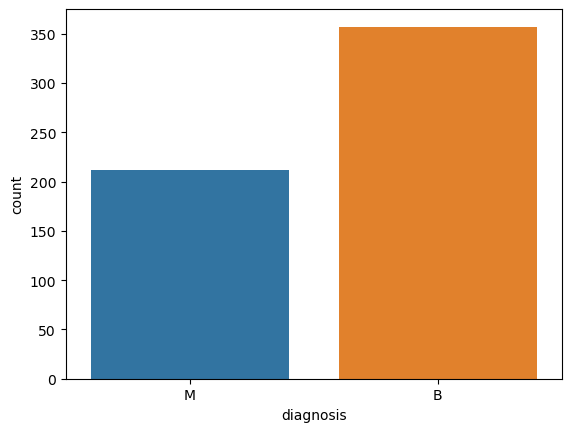

In [17]:
sns.countplot(x ='diagnosis', data = df)

In [18]:
df.shape

(569, 31)

In [19]:
#df.describe()

In [20]:
correlation = df.corr()
#correlation

In [21]:
correlation.shape

(30, 30)

<Axes: >

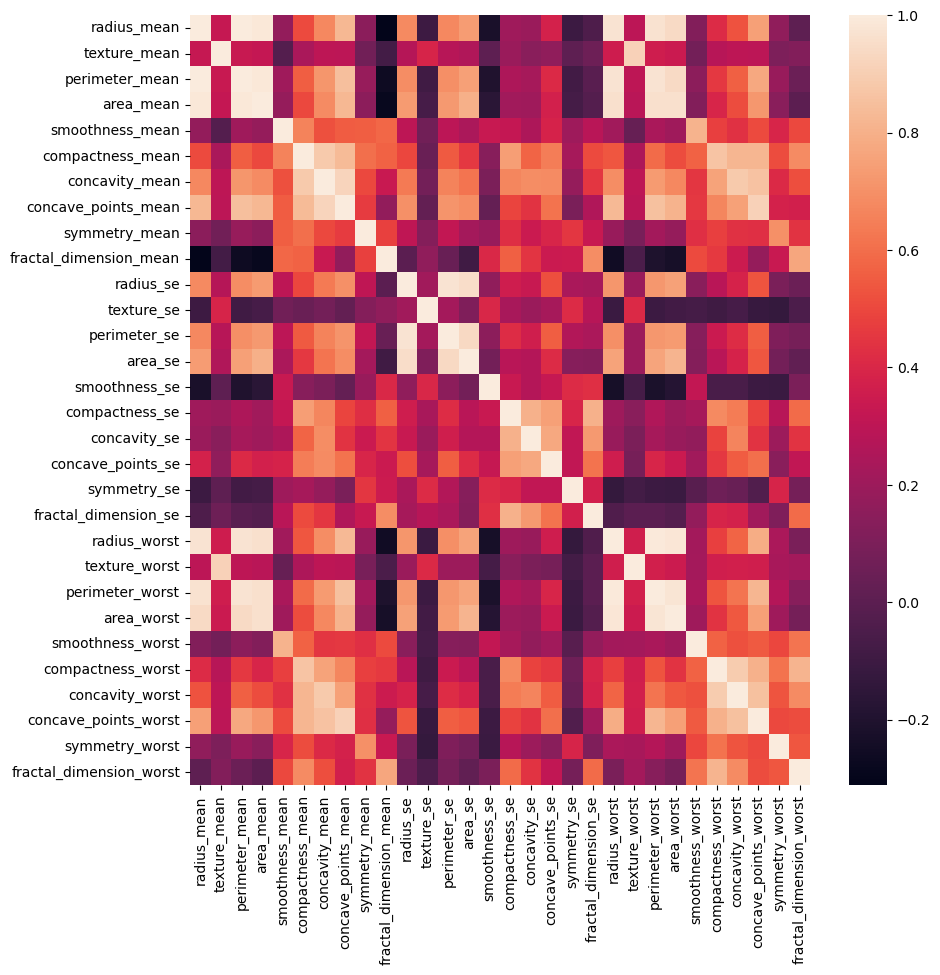

In [22]:
plt.figure(figsize=[10,10])
sns.heatmap(correlation)

In [23]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

In [26]:
d = df.drop(['diagnosis'], axis=1)
g = df['diagnosis']
d.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [27]:
g.head(2)

0    1
1    1
Name: diagnosis, dtype: int64

Creating our Train and Test set our data:

In [28]:
# divide the dataset into train and test set
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d, g, test_size=0.3)

df.shape

(569, 31)

In [29]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [30]:
y_train.shape, y_test.shape

((398,), (171,))

In [31]:
X_train #.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.081690,0.058140,0.1621,0.05425,...,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
434,14.86,16.94,94.89,673.7,0.08924,0.07074,0.033460,0.028770,0.1573,0.05703,...,16.310,20.54,102.30,777.5,0.12180,0.15500,0.12200,0.07971,0.2525,0.06827
310,11.70,19.11,74.33,418.7,0.08814,0.05253,0.015830,0.011480,0.1936,0.06128,...,12.610,26.55,80.92,483.1,0.12230,0.10870,0.07915,0.05741,0.3487,0.06958
312,12.76,13.37,82.29,504.1,0.08794,0.07948,0.040520,0.025480,0.1601,0.06140,...,14.190,16.40,92.04,618.8,0.11940,0.22080,0.17690,0.08411,0.2564,0.08253
237,20.48,21.46,132.50,1306.0,0.08355,0.08348,0.090420,0.060220,0.1467,0.05177,...,24.220,26.17,161.70,1750.0,0.12280,0.23110,0.31580,0.14450,0.2238,0.07127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,14.71,21.59,95.55,656.9,0.11370,0.13650,0.129300,0.081230,0.2027,0.06758,...,17.870,30.70,115.70,985.5,0.13680,0.42900,0.35870,0.18340,0.3698,0.10940
306,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.410,20.45,92.00,636.9,0.11280,0.13460,0.01120,0.02500,0.2651,0.08385
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.000000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
482,13.47,14.06,87.32,546.3,0.10710,0.11550,0.057860,0.052660,0.1779,0.06639,...,14.830,18.32,94.94,660.2,0.13930,0.24990,0.18480,0.13350,0.3227,0.09326


In [32]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train

array([[ 1.20367732, -0.17545004,  1.10689011, ...,  0.63376015,
         0.47704758, -0.82825017],
       [ 0.22469356, -0.55196157,  0.13437433, ..., -0.5365375 ,
        -0.62711999, -0.89040566],
       [-0.6719988 , -0.05377253, -0.70893754, ..., -0.87375985,
         0.93265858, -0.81705099],
       ...,
       [-1.79002663,  1.19284796, -1.79219952, ..., -1.74191837,
        -0.06611855, -0.77169428],
       [-0.16973757, -1.21315254, -0.17612522, ...,  0.2768791 ,
         0.5110968 ,  0.50893267],
       [ 2.99706205,  0.51788217,  3.03059277, ...,  2.00079604,
         0.3975994 ,  0.70211863]])

XG_Boost Model

In [37]:
import xgboost as xgb
xg_boost = xgb.XGBClassifier()

xg_boost.fit(X_train,y_train)

y_pred = xg_boost.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9824561403508771


In [39]:
import joblib
joblib.dump(xg_boost, 'breastCancer_xgb_model.pkl')

['breastCancer_xgb_model.pkl']